# Some FEM Solutions to 1D equations

In [36]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Poisson's Equation 1D

Comparison of FEM and exact solutions for the following equation

$$ \frac{d^2T}{dx^2} = -50 e^x $$

with boundary conditions $T(\pm 1) = 100 $

In [65]:
# problem boundaries
x_start, x_end = -1.0, 1.0
x = np.linspace(x_start, x_end, 100)

### Exact Solution
Exact solution can easily be determined by integrating twice and is given by 
$$ T = -50 e^{-x} + 50sinh(1)x + 50cosh(1) + 100 $$

Text(0, 0.5, 'T (exact)')

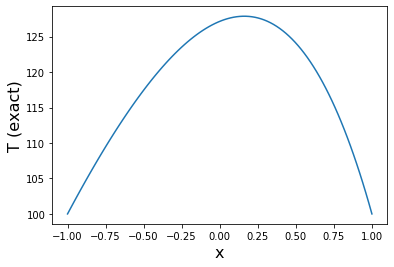

In [29]:
# exact solution
T_ex = -50*np.exp(x) + 50*np.sinh(1)*x + 50*np.cosh(1) + 100

# plot solution and format the graph
plt.plot(x,T_ex)
plt.xlabel('x', fontsize=16)
plt.ylabel('T (exact)', fontsize=16)

### Solution by Method of Collocation

Consider a trial solution $\tilde{T}(x) $ given by 
$$ \tilde{T} = 100 + a_1 \phi_1(x) + a_2\phi_2(x) $$

where $a_1, a_2$ are unknown constant coefficients, $\phi_1(x), \phi_2(x)$ are known "basis functions"

we choose the following basis functions
$$ \phi_1 = (1+x)(1-x) \\ \phi_2 = x(1+x)(1-x) $$

Note how the basis functions satisfy $\phi(\pm 1) = 0$ thus ensuring that $\tilde{T}(x)$ alwasy satisfies the boundary condition $\tilde{T}(\pm 1) = 100 $

We define a "Residual" as
$$ R(\tilde{T},x) \equiv \frac{dT^2}{dx^2} + 50e^x $$

Note how the residual takes a trial function $\tilde{T}$ and x as an argument. $R(\tilde{T},x)$ quantifies by how much a trial function $\tilde{T}$ fails the differential equation at a particular x

Since we have two unknowns $a_1, a_2$, we can set ourselves up so that $\tilde{T}$ solves the differential equation at exactly two points!

First we plug in the test function into the expression for residual
$$ \frac{d^2 \phi_1}{dx^2} = -2 \\ \frac{d^2 \phi_2}{dx^2} = -6x$$

$$R(\tilde{T},x) = -2a_1 -6a_2x + 50e^x $$

Let us pick the two points as $x=1/3$ and $x=-1/3$

If the trial solution $\tilde{T}$ solves the differential equation exactly at these two points, then we have
$$ R(\tilde{T}, x=\pm 1/3) = 0 $$

That is

$$ -2a_1 -2a_2 + 50e^{1/3} = 0 \\ -2a_1 +2a_2 + 50e^{-1/3} = 0 $$

We can solve this linear system of equations to find $a_1, a_2$

In [63]:
A = np.array([[-2, -2], [-2, 2]]) # coefficients of a1 and a2
b = np.array([[-50*np.exp(1/3)],[-50*np.exp(-1/3)]])
X = np.linalg.solve(A,b) # solve for unknowns a1 and a2 

# unpack a1 and a2 from X
a1 = X[0,0]
a2 = X[1,0]
print("a1 = {} \n a2 = {}".format(a1,a2))

a1 = 26.401796695748487 
 a2 = 8.488513931403753


Now that we have solved for $a_1$ and $a_2$, we have our approximate solution
$$ \tilde{T} = 100 + 26.40(1+x)(1-x) +8.48x(1+x)(1-x) $$

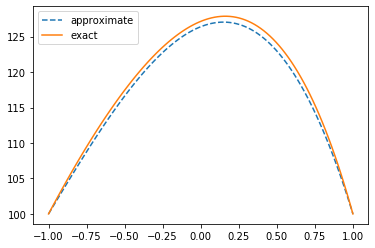

In [94]:
# plotting the approximate solution
T_approx = 100 + 26.4*(1+x)*(1-x) + 8.48*x*(1+x)*(1-x)
plt.plot(x,T_approx, linestyle="--", label="approximate")

#plot the exact solution for comparison
plt.plot(x,T_ex, label="exact")
plt.legend()

### Solution by Method of Weighted Residuals (Galerkin Method)